### Visualization of ear5 data in hma
The era5 data is downloaded from the gee platform and processed to xarray.dataset.


In [2]:
import xarray as xr
import numpy as np
import rasterio
import pandas as pd
import geopandas as gpd
from glob import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rasterio.features import geometry_mask
import warnings
warnings.filterwarnings('ignore')

In [3]:
path_hma_gtng = 'data/hma-extent/HMA/gtng_202307_hma_subregions.gpkg'
path_era5 = 'data/climate/era5_from_gee/era5_hma.nc'
path_era5_hma_stats = 'data/climate/era5_from_gee/era5_hma_stats.csv'
path_era5_hma_subregions_stats = 'data/climate/era5_from_gee/era5_hma_subregions_stats.csv'


In [4]:
hma_gtng = gpd.read_file(path_hma_gtng)
era5_xds = xr.open_dataset(path_era5)
era5_hma_stats_df = pd.read_csv(path_era5_hma_stats)
era5_hma_subregions_stats_df = pd.read_csv(path_era5_hma_subregions_stats)
era5_hma_stats_df


,year,t2m_mean,t2m_std,tp_mean,tp_std,te_mean,te_std
0,2000,-0.110297,7.929097,823.269042,864.480223,-392.335179,188.038721
1,2005,0.118795,7.994581,788.953745,747.157039,-388.390714,197.308452
2,2010,0.873627,7.824923,871.234751,961.168210,-392.977058,188.886095
3,2015,0.741264,7.955596,775.524573,799.487095,-398.918661,198.086796
4,2020,0.794922,7.691664,825.910090,954.954189,-382.970528,201.369480


### Tempreture

In [5]:
def plot_era5_year(ear5_xds, year, varname, vec_gpf, range_value=[-20, 40], ax=None):
    """
    Plot ERA5 data for a specific year and variable.    
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    var_year_xda = ear5_xds[varname].sel(time=str(year))    
    var_year_xda.plot(ax=ax, cmap='coolwarm', add_colorbar=False, 
                              vmin=range_value[0], vmax=range_value[1])    
    vec_gpf.plot(ax=ax, edgecolor='black', 
                                facecolor='none', linewidth=0.5, zorder=3)
    ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)    
    ax.set_title(f'ERA5 {varname} for {year}')
    return ax
    

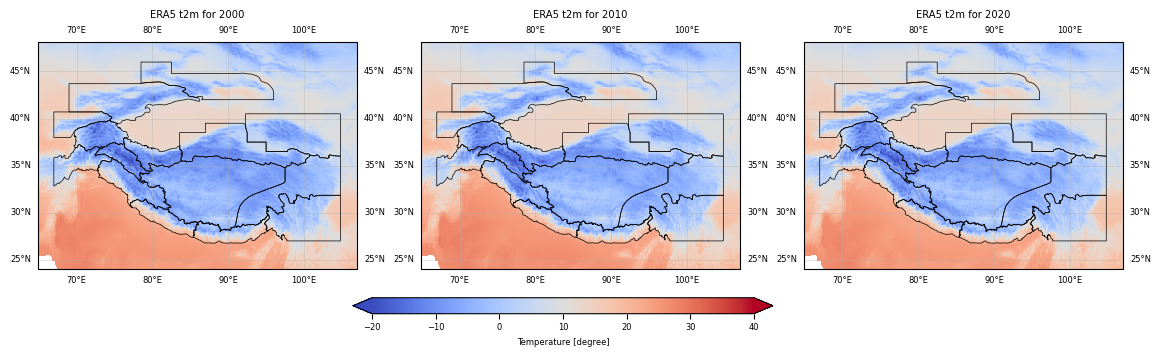

In [ ]:
plt.rcParams.update({'font.size':6})
fig, ax = plt.subplots(figsize=(14,4), nrows=1, ncols=3, 
                       subplot_kw={'projection': ccrs.PlateCarree()})
### temperature in 2000
ax_2000 = plot_era5_year(ear5_xds=era5_xds, year='2000', varname='t2m', 
                    vec_gpf=hma_gtng, range_value=[-20, 40], ax=ax[0])

### temperature in 2010
ax_2010 = plot_era5_year(ear5_xds=era5_xds, year='2010', varname='t2m', 
                    vec_gpf=hma_gtng, range_value=[-20, 40], ax=ax[1])
### temperature in 2020
ax_2020 = plot_era5_year(ear5_xds=era5_xds, year='2020', varname='t2m', 
                    vec_gpf=hma_gtng, range_value=[-20, 40], ax=ax[2])
# Add colorbar
cbar_ax = fig.add_axes([0.35, 0.1, 0.3, 0.04])
fig.colorbar(ax_2000.collections[0], cax=cbar_ax,  label='Temperature [degree]', 
                    orientation='horizontal', extend='both', fraction=0.05, pad=0.05)
# fig.savefig('figures/climate/era5_hma_tempreture_map.png')


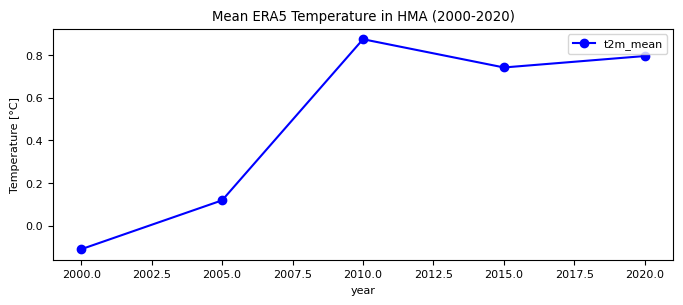

In [ ]:
plt.rcParams.update({'font.size':8})
fig, ax = plt.subplots(figsize=(8, 3))
era5_hma_stats_df.plot(x='year', y='t2m_mean', 
                       kind='line', ax=ax, marker='o', color='b')
ax.set_title('Mean ERA5 Temperature in HMA (2000-2020)')
ax.set_ylabel('Temperature [°C]')
# fig.savefig('figures/climate/era5_hma_temperature_years.png')


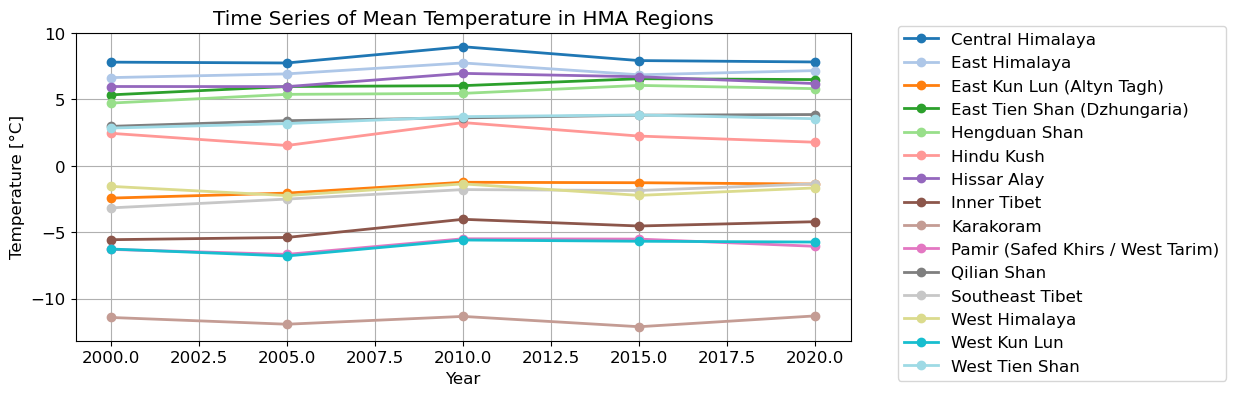

In [ ]:
## Plotting mean temperature for HMA subregions
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize=(10, 4))
colors = cm.get_cmap('tab20', len(era5_hma_subregions_stats_df['region'].unique()))  # Use a more colorful colormap
for i, (region_name, region_data) in enumerate(era5_hma_subregions_stats_df.groupby('region')):
    ax.plot(region_data['year'], region_data['t2m_mean'], 
            linewidth=2,  marker='o', label=region_name, color=colors(i))

ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [°C]')
ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
ax.set_title('Time Series of Mean Temperature in HMA Regions')
# fig.savefig('figures/climate/era5_hma_subregions_temperature_years.png', bbox_inches='tight')


### Precipitation
Research below revealed that the precipitation data of Era5 is larger than observation values.    
温婷婷,郭英香,董少睿, 东元祯,来晓玲.1979—2017年CRU、ERA5、CMFD格点降水数据在青藏高原适用性评估.干旱区研究.


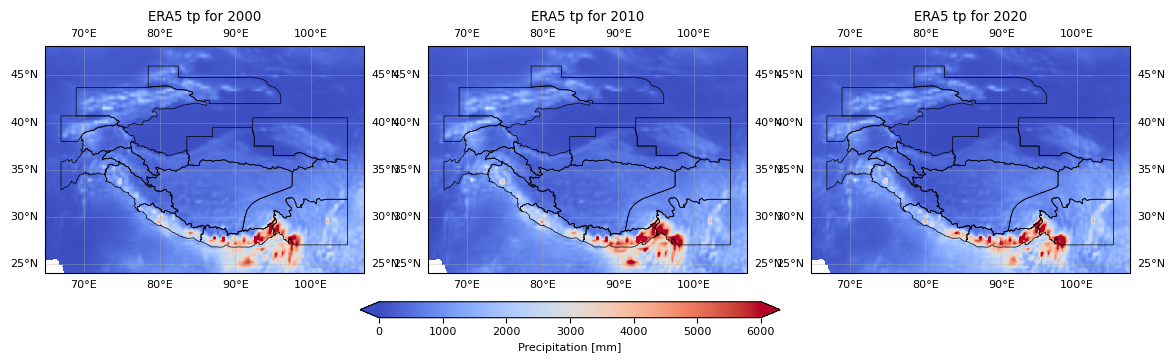

In [ ]:
plt.rcParams.update({'font.size':8})
fig, ax = plt.subplots(figsize=(14,4), nrows=1, ncols=3, 
                       subplot_kw={'projection': ccrs.PlateCarree()})
### temperature in 2000
ax_2000 = plot_era5_year(ear5_xds=era5_xds, year='2000', varname='tp', 
                    vec_gpf=hma_gtng, range_value=[0, 6000], ax=ax[0])

### temperature in 2010
ax_2010 = plot_era5_year(ear5_xds=era5_xds, year='2010', varname='tp', 
                    vec_gpf=hma_gtng, range_value=[0, 6000], ax=ax[1])
### temperature in 2020
ax_2020 = plot_era5_year(ear5_xds=era5_xds, year='2020', varname='tp', 
                    vec_gpf=hma_gtng, range_value=[0, 6000], ax=ax[2])
# Add colorbar
cbar_ax = fig.add_axes([0.35, 0.1, 0.3, 0.04])
fig.colorbar(ax_2000.collections[0], cax=cbar_ax,  label='Precipitation [mm]', 
                    orientation='horizontal', extend='both', fraction=0.05, pad=0.05)
# fig.savefig('figures/climate/era5_hma_precipitation_map.png')


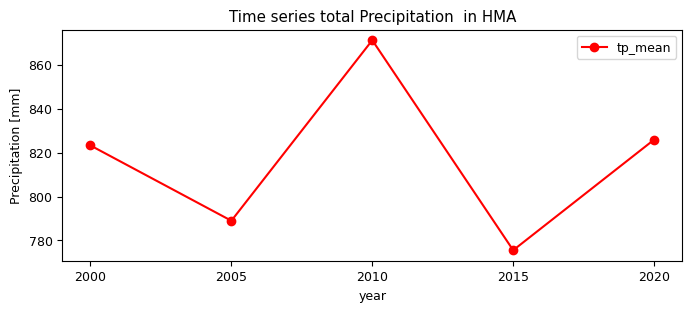

In [ ]:
plt.rcParams.update({'font.size':9})
fig, ax = plt.subplots(figsize=(8, 3))
era5_hma_stats_df.plot(x='year', y='tp_mean', 
                       kind='line', ax=ax, marker='o', color='r')
ax.set_title('Time series total Precipitation  in HMA')
ax.set_ylabel('Precipitation [mm]')
ax.set_xticks(era5_hma_stats_df['year']);
# fig.savefig('figures/climate/era5_hma_precipitation_years.png')



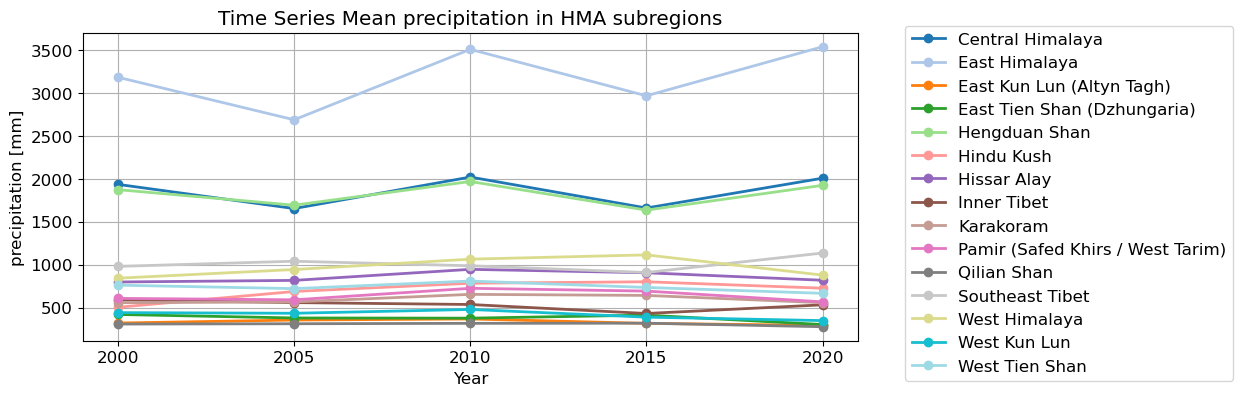

In [ ]:
## Plotting mean precipitation for HMA subregions
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize=(10, 4))
colors = cm.get_cmap('tab20', len(era5_hma_subregions_stats_df['region'].unique()))  # Use a more colorful colormap
for i, (region_name, region_data) in enumerate(era5_hma_subregions_stats_df.groupby('region')):
    ax.plot(region_data['year'], region_data['tp_mean'], 
            linewidth=2,  marker='o', label=region_name, color=colors(i))
ax.grid(True)
ax.set_xlabel('Year')
ax.set_xticks(era5_hma_stats_df['year']);
ax.set_ylabel('precipitation [mm]')
ax.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
ax.set_title('Time Series Mean precipitation in HMA subregions')
# fig.savefig('data/climate/era5_from_gee/era5_hma_subregions_precipitation_years.png', bbox_inches='tight')
